In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
# Get the data
# Use pandas to read loan_data as a dataframe called loans

loans = pd.read_csv('loan_data.csv')

In [6]:
# Check info , head , describe methods on loans
# info

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# head

loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
# Describe

loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


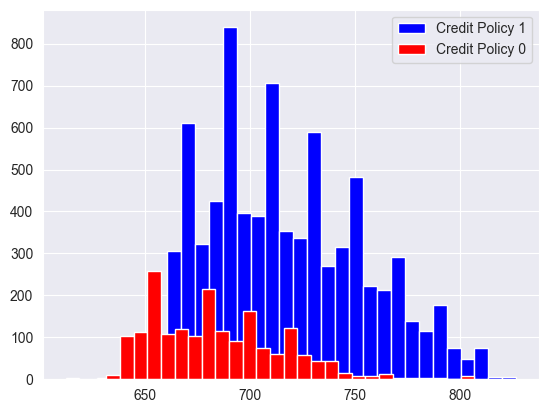

In [19]:
# Exploratory Data Analysis
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

# Separate data based on credit policy
credit_policy_1 = loans[loans['credit.policy'] == 1]['fico']
credit_policy_0 = loans[loans['credit.policy'] == 0]['fico']

# create hists
plt.hist(credit_policy_1, bins=30, label='Credit Policy 1', color='blue')
plt.hist(credit_policy_0, bins=30, label='Credit Policy 0', color='red')
plt.legend()

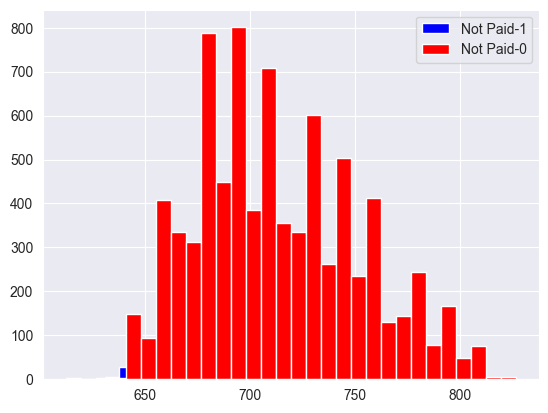

In [21]:
# create the same figure , except this time select by the not.fully.paid column

not_paid_1 = loans[loans['not.fully.paid'] == 1]['fico']
not_paid_0 = loans[loans['not.fully.paid'] == 0]['fico']

plt.hist(not_paid_1, bins=30, label='Not Paid-1', color='blue')
plt.hist(not_paid_0, bins=30, label='Not Paid-0', color='red')

plt.legend()

<Axes: xlabel='purpose', ylabel='count'>

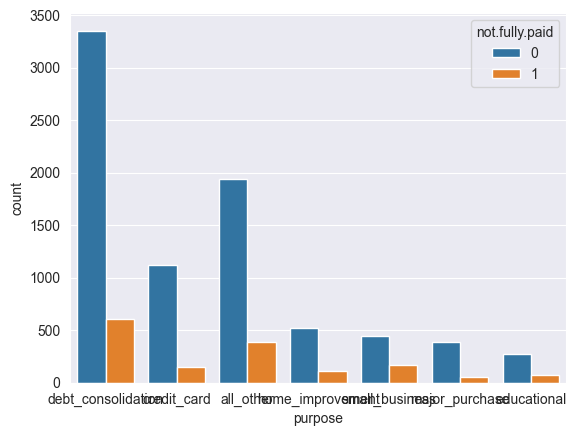

In [26]:
# create a countplot using seaborn showing the counts of loans by purpose , with the color hue defined by not.fully.paid.

sns.countplot(data=loans, x=loans['purpose'], hue='not.fully.paid')

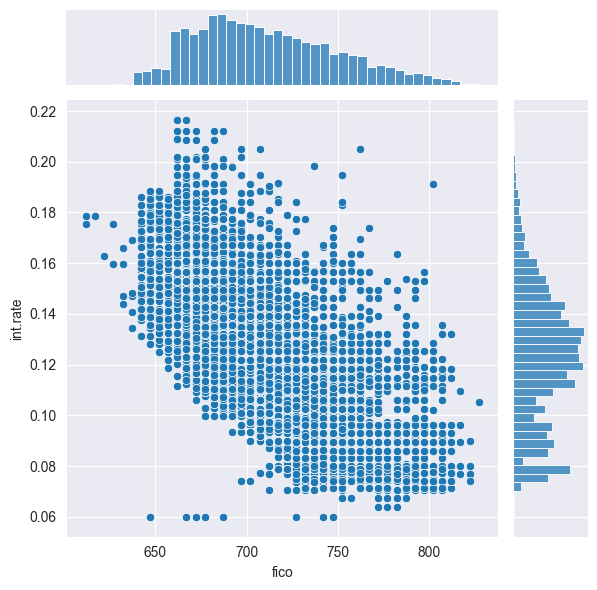

In [28]:
# See the trend between Fico score and interest rate

sns.jointplot(data=loans, x=loans['fico'], y=loans['int.rate'])

In [36]:
# Create the following lmplot to see if the trend differed between not.full paid and credit policy.


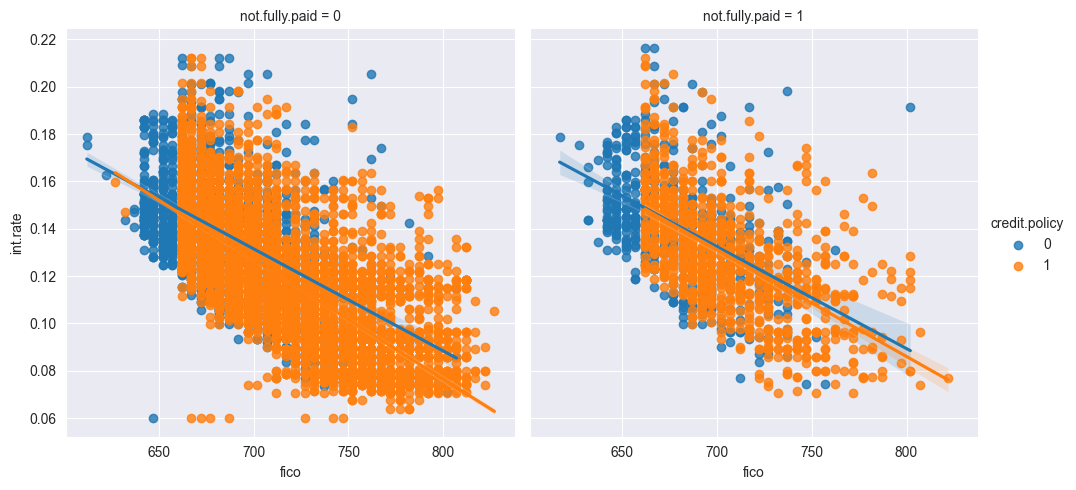

In [40]:
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

In [41]:
# Setting up the data
# check loans.info() again

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [45]:
# Create a list of the column names that have categorical features. Call this list cat_feats

cat_feats = loans.select_dtypes(include=['object']).columns.tolist()


In [46]:
# Now use pd.get_dummies (loans, columns=cat_feats, drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables . Set this dataframe as final_data

final_data = pd.get_dummies(data=loans, columns=cat_feats, drop_first=True)

In [57]:
# Train Test Split
# Use sklearn to split the data into a training set and a testing set 

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
# Training a Decision Tree Model
# import decisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [60]:
# Create an instance of DecisionTreeClassifier called dtree and fit to the training data

dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Predictions and Evaluation
# Predict the class of not.fully.paid for the X_test data

predictions = dtree.predict(X_test)

In [63]:
# Create classifications report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874


In [64]:
confusion_matrix(y_test, predictions)

array([[1996,  435],
       [ 340,  103]], dtype=int64)